### Problem Statement

Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
book=pd.read_csv('..\\may 5 batch codes\\Data Files\\book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


### Data Understanding

In [3]:
book.shape

(2000, 11)

In [4]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [6]:
book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [7]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64
YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64
CookBks
0    1138
1     862
Name: CookBks, dtype: int64
DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64
RefBks
0    1571
1     429
Name: RefBks, dtype: int64
ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64
GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64
ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64
ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64
ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64
Florence
0    1783
1     217
Name: Florence, dtype: int64


### Model Building

### Updating minimum support

#### Model 1 : min_support = 0.03, max_len=None, metric='confidence', min_threshold=0.8

In [8]:
frequent_itemsets1=apriori(df=book,min_support=0.03,use_colnames=True,max_len=None)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
176,0.0535,"(CookBks, DoItYBks, ArtBks, ChildBks, GeogBks)"
177,0.0405,"(CookBks, ArtBks, ChildBks, RefBks, GeogBks)"
178,0.0300,"(CookBks, ArtBks, ChildBks, ItalCook, GeogBks)"
179,0.0370,"(CookBks, ArtBks, DoItYBks, YouthBks, GeogBks)"


In [9]:
best_associates_book1=association_rules(df=frequent_itemsets1,metric='confidence',min_threshold=0.8)
best_associates_book1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalArt),(CookBks),0.0485,0.4310,0.0410,0.845361,1.961394,0.020096,3.679533
2,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
3,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
4,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.4230,0.0950,0.822511,1.944470,0.046143,3.250902
...,...,...,...,...,...,...,...,...,...
131,"(ChildBks, ArtBks, ItalCook, GeogBks)",(CookBks),0.0300,0.4310,0.0300,1.000000,2.320186,0.017070,inf
132,"(ItalCook, ArtBks, GeogBks)","(CookBks, ChildBks)",0.0360,0.2560,0.0300,0.833333,3.255208,0.020784,4.464000
133,"(ArtBks, DoItYBks, YouthBks, GeogBks)",(CookBks),0.0395,0.4310,0.0370,0.936709,2.173338,0.019975,8.990200
134,"(CookBks, ArtBks, DoItYBks, YouthBks, GeogBks)",(ChildBks),0.0370,0.4230,0.0310,0.837838,1.980704,0.015349,3.558167


#### Model 2 : min_support = 0.05, max_len=None,metric='confidence',min_threshold=0.8

In [10]:
frequent_itemsets2=apriori(df=book,min_support=0.05,use_colnames=True,max_len=None)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [11]:
best_associates_book2=association_rules(df=frequent_itemsets2,metric='confidence',min_threshold=0.8)
best_associates_book2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(CookBks, DoItYBks, YouthBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
59,"(ChildBks, DoItYBks, YouthBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
60,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


#### Model 3 : min_support = 0.07, max_len=None,metric='confidence',min_threshold=0.8

In [12]:
frequent_itemsets3=apriori(df=book,min_support=0.07,use_colnames=True,max_len=None)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(CookBks, ChildBks, DoItYBks, RefBks)"
62,0.0820,"(CookBks, ChildBks, DoItYBks, ArtBks)"
63,0.0890,"(CookBks, ChildBks, DoItYBks, GeogBks)"
64,0.0785,"(CookBks, ChildBks, RefBks, GeogBks)"


In [13]:
best_associates_book3=association_rules(df=frequent_itemsets3,metric='confidence',min_threshold=0.8)
best_associates_book3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
5,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
7,"(RefBks, DoItYBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
8,"(RefBks, ArtBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
9,"(RefBks, GeogBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152


#### Model 4 : min_support = 0.1, max_len=None,metric='confidence',min_threshold=0.8

In [14]:
frequent_itemsets4=apriori(df=book,min_support=0.1,use_colnames=True,max_len=None)
frequent_itemsets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [15]:
best_associates_book4=association_rules(df=frequent_itemsets4,metric='confidence',min_threshold=0.8)
best_associates_book4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
2,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


### Updating maximum length

#### Model 5 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.8

In [16]:
frequent_itemsets5=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets5

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [17]:
best_associates_book5=association_rules(df=frequent_itemsets5,metric='confidence',min_threshold=0.8)
best_associates_book5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(CookBks, DoItYBks, YouthBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
59,"(ChildBks, DoItYBks, YouthBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
60,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


#### Model 6 : min_support = 0.05, max_len=4,metric='confidence',min_threshold=0.8

In [18]:
frequent_itemsets6=apriori(df=book,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets6

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
93,0.0595,"(ArtBks, ChildBks, DoItYBks, GeogBks)"
94,0.0525,"(CookBks, ArtBks, DoItYBks, YouthBks)"
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"


In [19]:
best_associates_book6=association_rules(df=frequent_itemsets6,metric='confidence',min_threshold=0.8)
best_associates_book6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
5,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
7,"(RefBks, DoItYBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
8,"(RefBks, ArtBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
9,"(RefBks, GeogBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152


#### Model 7 : min_support = 0.05, max_len=3,metric='confidence',min_threshold=0.8

In [20]:
frequent_itemsets7=apriori(df=book,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets7

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
71,0.0640,"(CookBks, ItalCook, GeogBks)"
72,0.0535,"(RefBks, ArtBks, DoItYBks)"
73,0.0585,"(RefBks, DoItYBks, GeogBks)"
74,0.0730,"(ArtBks, DoItYBks, GeogBks)"


In [21]:
best_associates_book7=association_rules(df=frequent_itemsets7,metric='confidence',min_threshold=0.8)
best_associates_book7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
5,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
7,"(RefBks, DoItYBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
8,"(RefBks, ArtBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
9,"(RefBks, GeogBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152


#### Model 8 : min_support = 0.05, max_len=2,metric='confidence',min_threshold=0.8

In [22]:
frequent_itemsets8=apriori(df=book,min_support=0.05,use_colnames=True,max_len=2)
frequent_itemsets8

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [23]:
best_associates_book8=association_rules(df=frequent_itemsets8,metric='confidence',min_threshold=0.8)
best_associates_book8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf


### Updating minimum threshold for the metric 'Confidence'

#### Model 9 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.8

In [24]:
frequent_itemsets9=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets9

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [25]:
best_associates_book9=association_rules(df=frequent_itemsets9,metric='confidence',min_threshold=0.8)
best_associates_book9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(CookBks, DoItYBks, YouthBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
59,"(ChildBks, DoItYBks, YouthBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
60,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


#### Model 10 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.7

In [26]:
frequent_itemsets10=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets10

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [27]:
best_associates_book10=association_rules(df=frequent_itemsets10,metric='confidence',min_threshold=0.7)
best_associates_book10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(ChildBks, DoItYBks, YouthBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
83,"(DoItYBks, YouthBks, GeogBks)","(CookBks, ChildBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304
85,"(ArtBks, DoItYBks, ChildBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


#### Model 11 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.6

In [28]:
frequent_itemsets11=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets11

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [29]:
best_associates_book11=association_rules(df=frequent_itemsets11,metric='confidence',min_threshold=0.6)
best_associates_book11

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
130,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304
131,"(CookBks, ChildBks, DoItYBks, GeogBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845
132,"(CookBks, ChildBks, ArtBks, GeogBks)",(DoItYBks),0.0835,0.282,0.0535,0.640719,2.272052,0.029953,1.998433
133,"(ArtBks, DoItYBks, ChildBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


### Updating metric as support and updating minimum threshold of support

#### Model 12 : min_support = 0.05, max_len=None,metric='support',min_threshold=0.07

In [30]:
frequent_itemsets12=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets12

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [31]:
best_associates_book12=association_rules(df=frequent_itemsets12,metric='support',min_threshold=0.07)
best_associates_book12

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
301,"(ArtBks, GeogBks)","(CookBks, ChildBks)",0.1275,0.2560,0.0835,0.654902,2.558211,0.050860,2.155909
302,(CookBks),"(ChildBks, ArtBks, GeogBks)",0.4310,0.1020,0.0835,0.193735,1.899368,0.039538,1.113778
303,(ChildBks),"(CookBks, ArtBks, GeogBks)",0.4230,0.1035,0.0835,0.197400,1.907242,0.039720,1.116994
304,(ArtBks),"(CookBks, ChildBks, GeogBks)",0.2410,0.1495,0.0835,0.346473,2.317545,0.047471,1.301400


#### Model 13 : min_support = 0.05, max_len=5,metric='support',min_threshold=0.1

In [32]:
frequent_itemsets13=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets13

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [33]:
best_associates_book13=association_rules(df=frequent_itemsets13,metric='support',min_threshold=0.1)
best_associates_book13

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


#### Model 14 : min_support = 0.05, max_len=5,metric='support',min_threshold=0.2

In [34]:
frequent_itemsets14=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets14

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, YouthBks, GeogBks)"
96,0.0560,"(CookBks, ArtBks, YouthBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [35]:
best_associates_book14=association_rules(df=frequent_itemsets14,metric='support',min_threshold=0.2)
best_associates_book14

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


### Data Visualization

In [36]:
print(frequent_itemsets1.shape)
print(frequent_itemsets2.shape)
print(frequent_itemsets3.shape)
print(frequent_itemsets4.shape)
print(frequent_itemsets5.shape)
print(frequent_itemsets6.shape)
print(frequent_itemsets7.shape)
print(frequent_itemsets8.shape)
print(frequent_itemsets9.shape)
print(frequent_itemsets10.shape)
print(frequent_itemsets11.shape)
print(frequent_itemsets12.shape)
print(frequent_itemsets13.shape)
print(frequent_itemsets14.shape)

(181, 2)
(100, 2)
(66, 2)
(39, 2)
(100, 2)
(98, 2)
(76, 2)
(36, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


In [37]:
print(best_associates_book1.shape)
print(best_associates_book2.shape)
print(best_associates_book3.shape)
print(best_associates_book4.shape)
print(best_associates_book5.shape)
print(best_associates_book6.shape)
print(best_associates_book7.shape)
print(best_associates_book8.shape)
print(best_associates_book9.shape)
print(best_associates_book10.shape)
print(best_associates_book11.shape)
print(best_associates_book12.shape)
print(best_associates_book13.shape)
print(best_associates_book14.shape)

(136, 9)
(62, 9)
(33, 9)
(6, 9)
(62, 9)
(58, 9)
(24, 9)
(1, 9)
(62, 9)
(87, 9)
(135, 9)
(306, 9)
(100, 9)
(2, 9)


### Displot

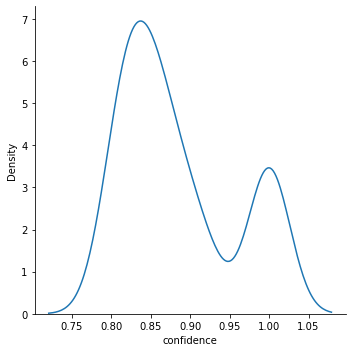

In [38]:
sns.displot(data=best_associates_book1,x='confidence',kind='kde')
plt.show()

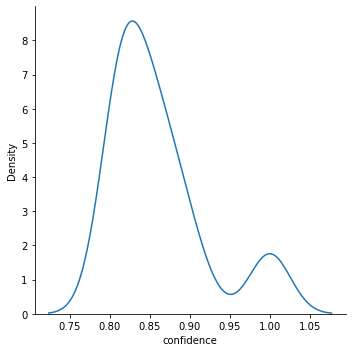

In [39]:
sns.displot(data=best_associates_book2,x='confidence',kind='kde')
plt.show()

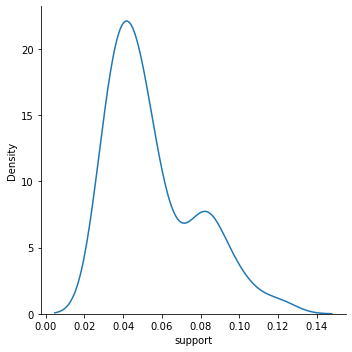

In [40]:
sns.displot(data=best_associates_book1,x='support',kind='kde')
plt.show()

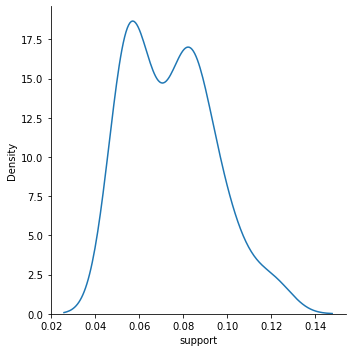

In [41]:
sns.displot(data=best_associates_book2,x='support',kind='kde')
plt.show()

### Heatmap of Confidence and Support

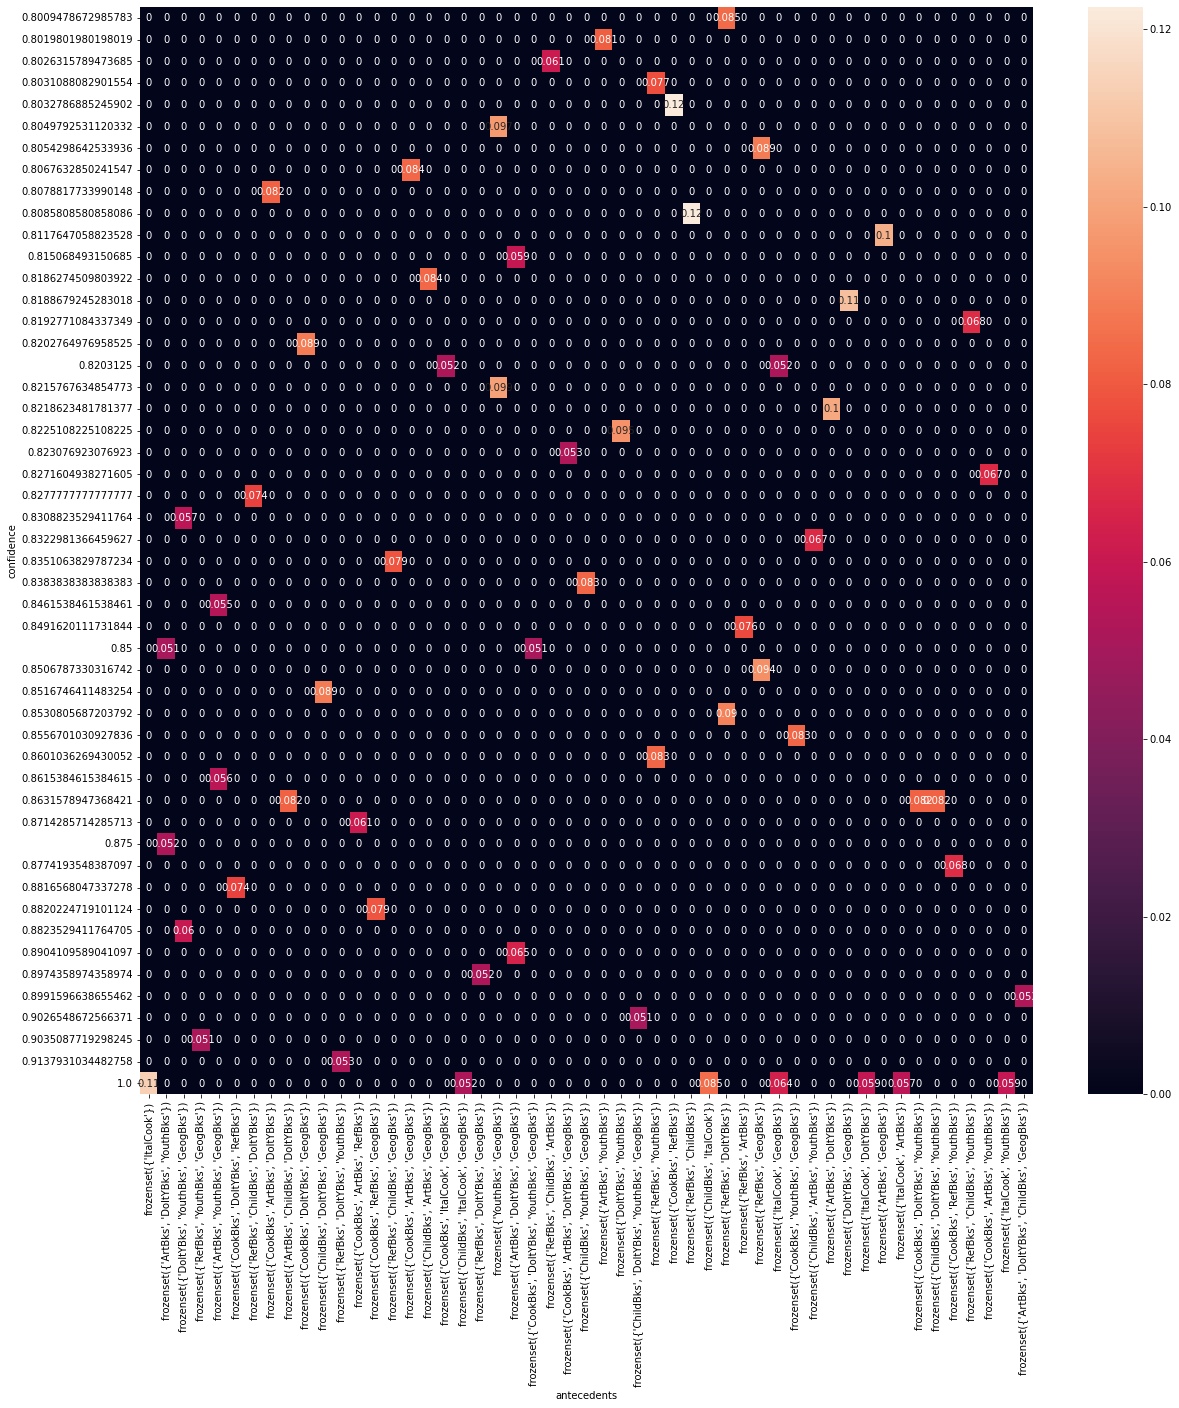

In [42]:
plt.figure(figsize=(20,20))
pivot1=pd.pivot_table(data=best_associates_book5,index='confidence',columns='antecedents',values='support').fillna(0)
sns.heatmap(pivot1,annot=True)
plt.show()

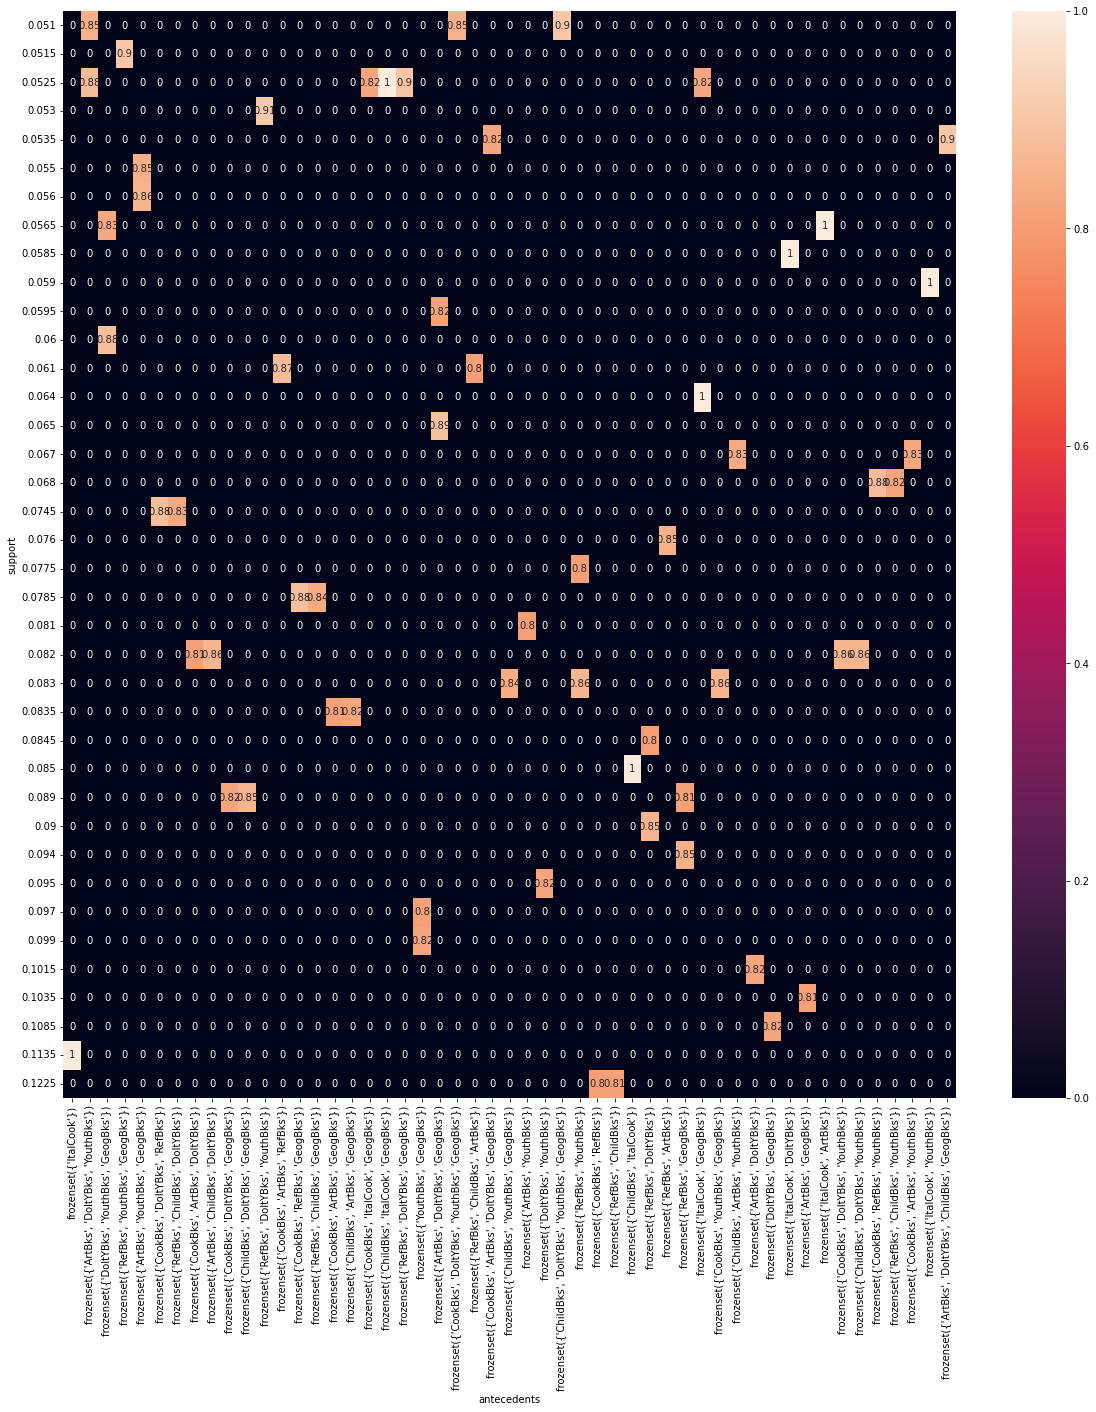

In [43]:
plt.figure(figsize=(20,20))
pivot2=pd.pivot_table(data=best_associates_book5,index='support',columns='antecedents',values='confidence').fillna(0)
sns.heatmap(pivot2,annot=True)
plt.show()

### Updating minimum support

In [44]:
min_support=[0.03,0.05,0.07,0.1]
no_of_frequent_itemsets = [181,100,66,39]
no_of_best_associates = [136,62,33,6]

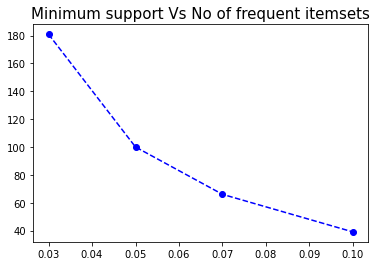

In [45]:
plt.plot(min_support,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum support Vs No of frequent itemsets',fontsize=15)
plt.show()

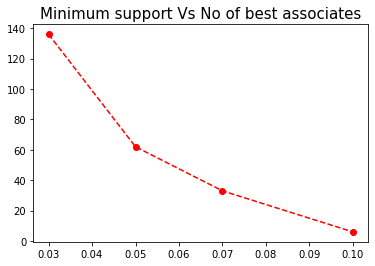

In [46]:
plt.plot(min_support,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum support Vs No of best associates',fontsize=15)
plt.show()

##### As minimum support increases from 0.03 till 0.1, No. of Itemsets and also No. of best associates decreases

### Updating maximum length

In [47]:
max_length=[5,4,3,2]
no_of_frequent_itemsets = [100,98,76,36]
no_of_best_associates = [62,58,24,1]

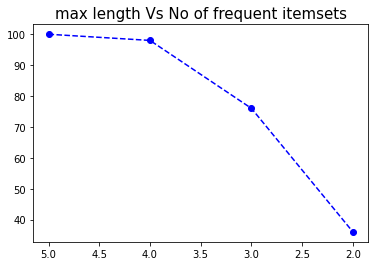

In [48]:
plt.plot(max_length,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('max length Vs No of frequent itemsets',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

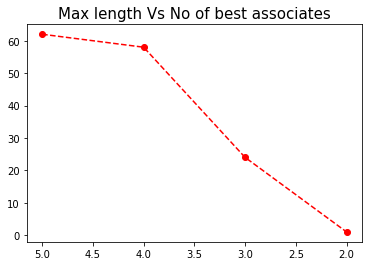

In [49]:
plt.plot(max_length,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Max length Vs No of best associates',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

##### As maximum length decreases from 5 till 2, No. of Itemsets and also No. of best associates decreases

### Updating Minimum threshold of metric 'Confidence'

In [50]:
minimum_threshold =[0.8,0.7,0.6]
no_of_frequent_itemsets = [100,100,100]
no_of_best_associates = [62,87,135]

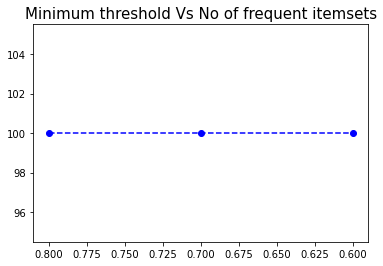

In [51]:
plt.plot(minimum_threshold,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum threshold Vs No of frequent itemsets',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

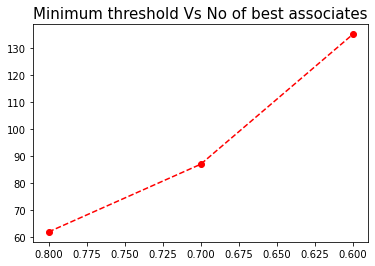

In [52]:
plt.plot(minimum_threshold,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum threshold Vs No of best associates',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

##### As Minimum length for the metric 'confidence' decreases from 0.8 till 0.6, 
* There is no changes in No. of Itemsets
* No. of best associates increases

### Updating metric as 'support' and update minimum threshold of the support

In [53]:
minimum_threshold =[0.07,0.1,0.2]
no_of_frequent_itemsets = [100,100,100]
no_of_best_associates = [306,100,2]

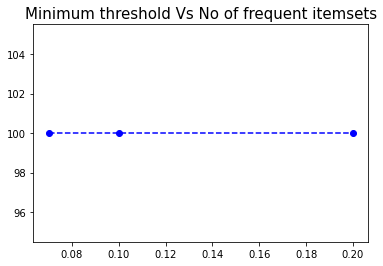

In [54]:
plt.plot(minimum_threshold,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum threshold Vs No of frequent itemsets',fontsize=15)
plt.show()

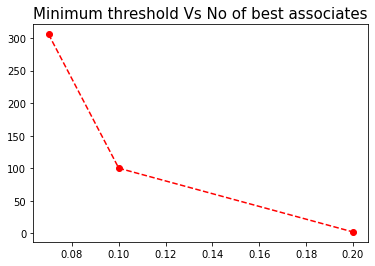

In [55]:
plt.plot(minimum_threshold,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum threshold Vs No of best associates',fontsize=15)
plt.show()

##### As we change the metric as 'support' and increase the threshold from 0.07 to 0.2,

* There is no changes in No. of Itemsets
* No. of best associates decreases

### Summary

* As minimum support increases from 0.03 till 0.1, No. of Itemsets and also No. of best associates decreases

* As maximum length decreases from 5 till 2, No. of Itemsets and also No. of best associates decreases

* As Minimum length for the metric 'confidence' decreases from 0.8 till 0.6,
        * There is no changes in No. of Itemsets
        * No. of best associates increases

* As we change the metric as 'support' and increase the threshold from 0.07 to 0.2,
        * There is no changes in No. of Itemsets
        * No. of best associates decreases

### End